(569, 32)
   0   1      2      3       4       5        6        7       8        9   \
0   6   1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710   
1   6   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
2   8   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
3   8   1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
4   8   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   

    ...        22     23      24      25      26      27      28      29  \
0   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2

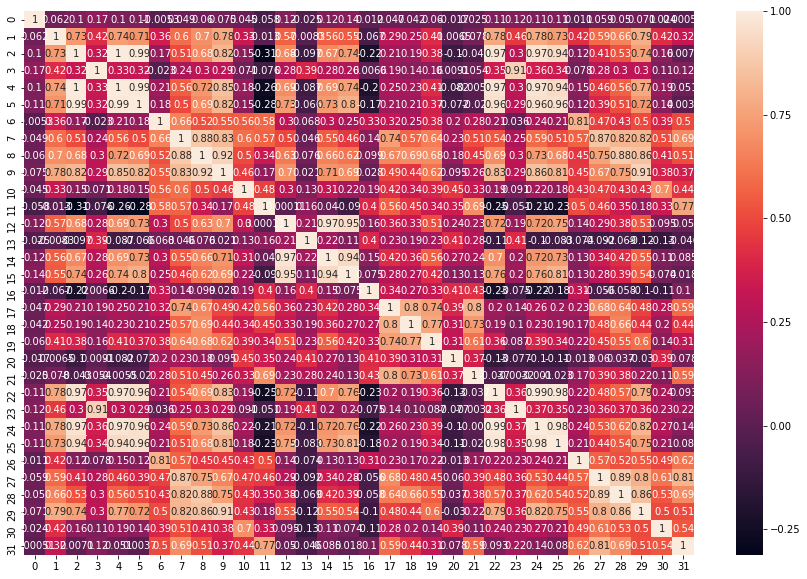

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./data/data.csv', header=None)
df[1] = df[1].astype('category').cat.codes
df[0] = [len(str(x)) for x in df[0]]
print(df.shape)
print(df.head(5))
print(df.describe())

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
#ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
ax = sns.heatmap(corr_matrix, ax=ax, annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

<function matplotlib.pyplot.show>

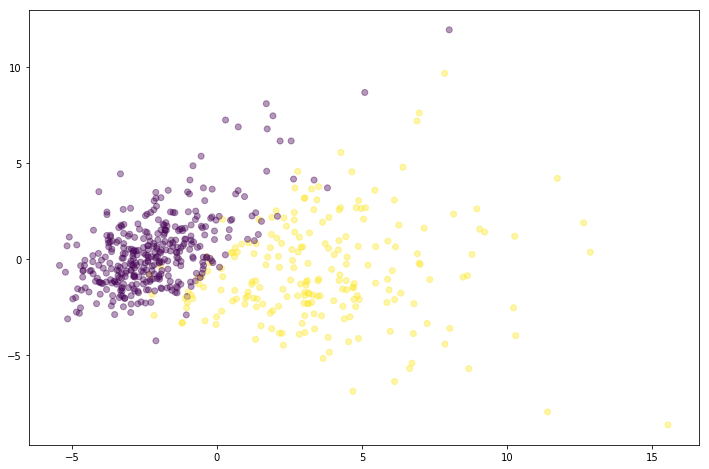

In [30]:
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

y = df[1]
df.drop([0,1,2], axis=1, inplace=True)
df = (df-df.mean())/df.std()

pca = decomposition.PCA(n_components=2)
pca.fit(df)
train_red = pca.transform(df)


plt.figure(figsize=(12, 8))
plt.scatter(train_red[:,0],train_red[:,1], c=y, alpha=0.4)
plt.show